In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import metrics


# Load Dataset

In [ ]:
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Logistic Regression with all columns

In [ ]:
x = df.drop('Default', axis=1)
y = df['Default']

x_scaled = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)


poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)

model = LogisticRegression()
model.fit(x_poly,y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

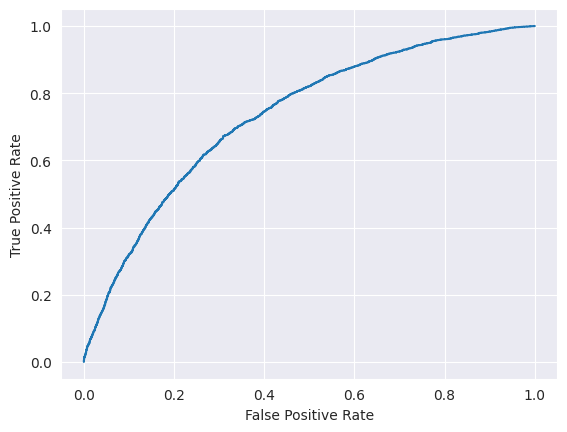

In [ ]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machines with Radial Basis Function kernel

In [ ]:
# model = SVC(kernel='rbf', probability=True)
# model.fit(x_train, y_train)

# param_grid = {'C': np.logspace(-3, 3, 7)}
#
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(x_train, y_train)
#
# best_C = grid_search.best_params_['C']

model = SVC(kernel='rbf', C=1, probability=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()